In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, get_scorer
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.svm import SVR
from sklearn import linear_model
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline



In [2]:
# weatherfootdata = pd.read_csv("./data_files/FootTrafficWeather_July2022_Melbourne.csv")
weatherfootdata = pd.read_csv("./data_files/FootTrafficWeatherMelb2_20130101_20220701_v3.csv")

In [3]:
weatherfootdata

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual,is_holiday,is_lockdown,OfflineRetail_Original_Turnover,OfflineRetail_Seasonally_Adjusted_Turnover,OfflineRetail_Trend_Turnover
0,2022-07-31,327383.0,0.0,N,14.7,Y,4.3,Y,4.8,6,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
1,2022-07-30,462115.0,0.0,N,13.0,Y,2.1,Y,11.3,5,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2,2022-07-29,405511.0,1.0,N,12.7,Y,6.5,Y,11.2,4,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
3,2022-07-28,334858.0,1.0,N,13.2,Y,9.3,Y,9.3,3,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
4,2022-07-27,340569.0,3.0,N,15.3,Y,9.3,Y,7.7,2,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,2013-01-05,195376.0,NaN,NaN,NaN,NaN,NaN,NaN,30.5,5,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4
3495,2013-01-04,192351.0,NaN,NaN,NaN,NaN,NaN,NaN,33.5,4,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4
3496,2013-01-03,226005.0,NaN,NaN,NaN,NaN,NaN,NaN,32.8,3,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4
3497,2013-01-02,244083.0,NaN,NaN,NaN,NaN,NaN,NaN,31.9,2,4217000,2.50,NaN,NaN,5274.0,5364.9,5362.4


In [34]:
plt.figure(figsize=(20,10))
i=1
for col in weatherfootdata.columns:
    if col != 'date':
        if weatherfootdata[col].dtypes == np.int64 or weatherfootdata[col].dtypes == np.float64 and col != 'total_people':
            plt.subplot(2,3,i)
            sns.scatterplot(x=col , y = 'total_people', data = weatherfootdata, palette="Purples")
            i = i+1
            plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

In [4]:
le = preprocessing.LabelEncoder()
weatherfootdata['rain_quality']=le.fit_transform(weatherfootdata['rain_quality'])
weatherfootdata['max_temp_quality']=le.fit_transform(weatherfootdata['max_temp_quality'])
weatherfootdata['min_temp_quality']=le.fit_transform(weatherfootdata['min_temp_quality'])
weatherfootdata['solar_exp']=le.fit_transform(weatherfootdata['solar_exp'])


weatherfootdata['date'] = pd.to_datetime(weatherfootdata['date'])
weatherfootdata['date']=weatherfootdata['date'].map(dt.datetime.toordinal)
weatherfootdata = weatherfootdata[weatherfootdata["total_rain"].notna()]
weatherfootdata = weatherfootdata[weatherfootdata["max_temp"].notna()]
weatherfootdata = weatherfootdata[weatherfootdata["min_temp"].notna()]
weatherfootdata

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual,is_holiday,is_lockdown,OfflineRetail_Original_Turnover,OfflineRetail_Seasonally_Adjusted_Turnover,OfflineRetail_Trend_Turnover
0,738367,327383.0,0.0,0,14.7,1,4.3,1,34,6,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
1,738366,462115.0,0.0,0,13.0,1,2.1,1,99,5,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
2,738365,405511.0,1.0,0,12.7,1,6.5,1,98,4,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
3,738364,334858.0,1.0,0,13.2,1,9.3,1,79,3,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
4,738363,340569.0,3.0,0,15.3,1,9.3,1,63,2,5151000,1.78,NaN,NaN,8562.7,8947.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,735025,263851.0,0.0,0,17.3,1,12.6,1,48,3,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8
3343,735024,251066.0,0.0,0,14.6,1,11.9,1,35,2,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8
3344,735023,245211.0,0.2,0,15.0,1,11.1,1,24,1,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8
3345,735022,238200.0,0.2,0,14.8,1,10.7,1,38,0,4217000,2.50,NaN,NaN,5154.2,5412.4,5411.8


In [38]:
weatherfootdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 0 to 3346
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      3342 non-null   int64  
 1   total_people              3342 non-null   float64
 2   total_rain                3342 non-null   float64
 3   rain_quality              3342 non-null   int32  
 4   max_temp                  3342 non-null   float64
 5   max_temp_quality          3342 non-null   int32  
 6   min_temp                  3342 non-null   float64
 7   min_temp_quality          3342 non-null   int32  
 8   solar_exp                 3342 non-null   int64  
 9   WeekDay                   3342 non-null   int64  
 10  population_annual         3342 non-null   int64  
 11  population_change_annual  3342 non-null   float64
dtypes: float64(5), int32(3), int64(4)
memory usage: 300.3 KB


In [23]:
weatherfootdata

,date,total_people,total_rain,rain_quality,max_temp,max_temp_quality,min_temp,min_temp_quality,solar_exp,WeekDay,population_annual,population_change_annual
0,2022-07-31,327383.0,0.0,0,14.7,1,4.3,1,4.8,6,5151000,1.78
1,2022-07-30,462115.0,0.0,0,13.0,1,2.1,1,11.3,5,5151000,1.78
2,2022-07-29,405511.0,1.0,0,12.7,1,6.5,1,11.2,4,5151000,1.78
3,2022-07-28,334858.0,1.0,0,13.2,1,9.3,1,9.3,3,5151000,1.78
4,2022-07-27,340569.0,3.0,0,15.3,1,9.3,1,7.7,2,5151000,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,2013-01-05,195376.0,NaN,2,NaN,2,NaN,2,30.5,5,4217000,2.50
3495,2013-01-04,192351.0,NaN,2,NaN,2,NaN,2,33.5,4,4217000,2.50
3496,2013-01-03,226005.0,NaN,2,NaN,2,NaN,2,32.8,3,4217000,2.50
3497,2013-01-02,244083.0,NaN,2,NaN,2,NaN,2,31.9,2,4217000,2.50


In [5]:
y = weatherfootdata['total_people']
x = weatherfootdata[['date','total_rain', 'rain_quality', 'max_temp',
       'max_temp_quality', 'min_temp', 'min_temp_quality', 'solar_exp',
       'WeekDay', 'population_annual', 'population_change_annual']]

In [30]:
weatherfootdata.columns

Index(['date', 'total_people', 'total_rain', 'rain_quality', 'max_temp',
       'max_temp_quality', 'min_temp', 'min_temp_quality', 'solar_exp',
       'WeekDay', 'population_annual', 'population_change_annual'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

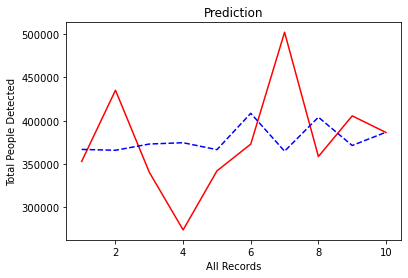

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
# Predicting the Salary for the Test values
y_pred = lr.predict(X_test)
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='--') 
plt.title('Prediction')
plt.xlabel('All Records')
plt.ylabel('Total People Detected')
plt.show()

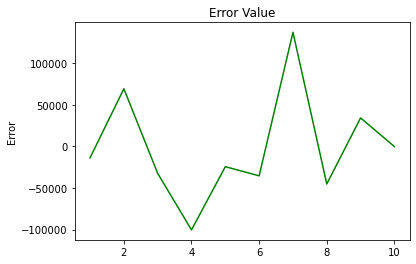

In [17]:
error_values = [i for i in range(1,len(y_test)+1,1)]
error_margin = y_test - y_pred
plt.plot(error_values, error_margin, color='green', linestyle='-')
plt.title('Error Value')
plt.ylabel('Error')
plt.show()

In [22]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print("MAE",mean_absolute_error(y_test,y_pred))

RMSE 11.05471806535221
MAE 49278.41263700723


In [27]:
# Only on July data
models = [LinearRegression(), linear_model.Lasso(alpha=0.1), SVR()]
cv = KFold(n_splits=5)
names = ["Linear Regression", "Lasso Regression", "Support Vector Regression"]
for model, name in zip(models, names):
    print(name)
    for score in ["neg_mean_absolute_error", "neg_root_mean_squared_error"]:
        print (score, names),
        print (cross_val_score(model, x, y, scoring=score, cv=cv).max())

Linear Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-35679.89150440693
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-44477.12841960014
Lasso Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-35679.91066813469
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-44477.121175771965
Support Vector Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-34343.499999999825
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-46978.63291433623


In [8]:
# Done on v3 of data
models = [LinearRegression(), linear_model.Lasso(alpha=0.1, max_iter=10000), SVR()]
cv = KFold(n_splits=5)
names = ["Linear Regression", "Lasso Regression", "Support Vector Regression"]
for model, name in zip(models, names):
    print(name)
    for score in ["neg_mean_absolute_error", "neg_root_mean_squared_error"]:
        print (score, names),
        print (cross_val_score(model, x, y, scoring=score, cv=cv).max())

Linear Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-110600.42463210461
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-132155.96950467143
Lasso Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-110600.32568343662
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-132155.76399387533
Support Vector Regression
neg_mean_absolute_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-154724.94428375224
neg_root_mean_squared_error ['Linear Regression', 'Lasso Regression', 'Support Vector Regression']
-175615.74748768867


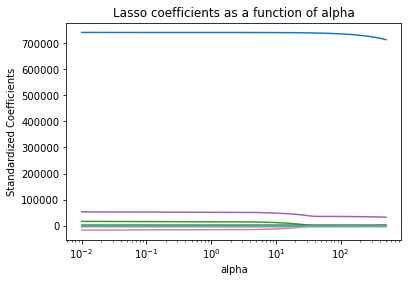

In [36]:
alphas = np.linspace(0.01,500,100)
lasso = linear_model.Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [33]:
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)
LassoCV(cv=5, max_iter=10000, random_state=0)

# Set best alpha
lasso_best = linear_model.Lasso(alpha=model.alpha_)
print("Best Value Of Alpha: ", lasso_best.fit(X_train, y_train))
print(list(zip(lasso_best.coef_, x)))

 Best Value Of Alpha Lasso(alpha=15084537.746128092)
[(-0.0, 'date'), (-0.0, 'total_rain'), (-0.0, 'rain_quality'), (0.0, 'max_temp'), (0.0, 'max_temp_quality'), (0.0, 'min_temp'), (0.0, 'min_temp_quality'), (0.0, 'solar_exp'), (-0.0, 'WeekDay'), (-0.09363194392481339, 'population_annual'), (0.0, 'population_change_annual')]


In [41]:
# polynomial features added, end results prove to be worst

poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)
X_train_poly = poly.fit_transform(X_train)
polynomial_column_names = poly.get_feature_names(input_features = X_train.columns)
X_train_poly = pd.DataFrame(data = X_train_poly, columns = polynomial_column_names )
X_train_poly.columns = X_train_poly.columns.str.replace(' ', '_')
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')

c:\Users\loong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
<ipython-input-41-7413920b6562>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')


In [43]:
sc = StandardScaler()
X_train_poly_scaled = sc.fit_transform(X_train_poly)
X_train_poly_scaled = pd.DataFrame(data = X_train_poly_scaled, columns = X_train_poly.columns)
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = sc.transform(X_test_poly)

In [80]:
lasso_params = {'fit__alpha':[0.005, 0.01, 0.03, 0.05, 0.1, 0.5]}
ridge_params = {'fit__alpha':[500, 550, 580, 600, 620, 650, 800]}

pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge())])

models3 = {'Lasso': GridSearchCV(pipe1, param_grid=lasso_params).fit(x,y).best_estimator_ ,
           'Ridge': GridSearchCV(pipe2, param_grid=ridge_params).fit(x,y).best_estimator_,}

c:\Users\loong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.165e+13, tolerance: 9.771e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\loong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+13, tolerance: 9.150e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\loong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.391e+13, toleranc

In [81]:
models3

{'OLS': Pipeline(steps=[('poly', PolynomialFeatures()), ('fit', LinearRegression())]),
 'Lasso': Pipeline(steps=[('poly', PolynomialFeatures()), ('fit', Lasso(alpha=0.005))]),
 'Ridge': Pipeline(steps=[('poly', PolynomialFeatures()), ('fit', Ridge(alpha=650))])}

In [84]:
from sklearn.metrics import mean_squared_error
models = [linear_model.Lasso(alpha=0.005), linear_model.Ridge(alpha=650)]
cv = KFold(n_splits=5)
names = ["Lasso Regression", "Ridge Regression"]
for model, name in zip(models, names):
    model.fit(X_train_poly_scaled, y_train)
    y_pred = model.predict(X_test_poly_scaled)
    mse = mean_squared_error(y_pred, y_test)
    print(mse)

21849310701.90157
27205552163.118458


c:\Users\loong\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.780e+13, tolerance: 1.044e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\loong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\loong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
